# MDI 720 : Statistiques
## CD
### *Joseph Salmon*

This notebook reproduces the pictures for the course "CD"

In [1]:
from functools import partial
import numpy as np
from os import mkdir, path
import seaborn as sns
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
from matplotlib.patches import Polygon, Circle

# BEWARE: the prox_collection file is loaded in the Lasso course
from prox_collection import l22_prox, l1_prox, l0_prox, scad_prox, mcp_prox, \
    log_prox, sqrt_prox, enet_prox
from prox_collection import l22_pen, l1_pen, l0_pen, \
    scad_pen, mcp_pen, log_pen, sqrt_pen, enet_pen
    
%matplotlib notebook

In [2]:
dirname = "../prebuiltimages/"
if not path.exists(dirname):
    mkdir(dirname)

imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
plt.close("all")

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()


###############################################################################
# display function:

saving = False


def my_saving_display(fig, dirname, filename, imageformat, saving=False):
    """"Saving with personal function."""
    filename = filename.replace('.', 'pt')  # remove "." to avoid floats issues
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)

In [3]:
###############################################################################
# plotting level set function

def plotting_level_set(func, Y, X, name, precision=12):
    """ plotting level sets"""
    fig1 = plt.figure(figsize=(6, 6))
    plt.contourf(X, Y, func(X, Y), precision, alpha=.75, cmap=plt.cm.hot)
    plt.contour(X, Y, func(X, Y), precision, colors='black', linewidth=1)
    plt.show()
    my_saving_display(fig1, dirname, name, '.svg')
    return

<IPython.core.display.Javascript object>


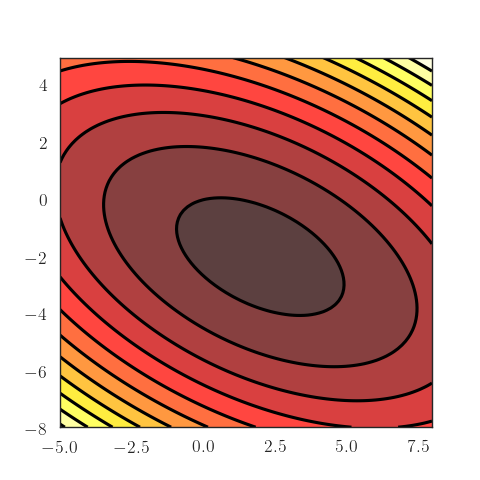

In [4]:
###############################################################################
# quadratic level set

def funct_quad_bis(X, Y):
    """ quadratic function to be displayed"""
    return 0.5 * (3 * X ** 2 + 6 * Y ** 2 + 4 * (X * Y)) - 2 * X + 8 * Y
Y, X = np.mgrid[-8:5:100j, -5:8:100j]
name = "quadractic_level_set"
plotting_level_set(funct_quad_bis, Y, X, name)


<IPython.core.display.Javascript object>


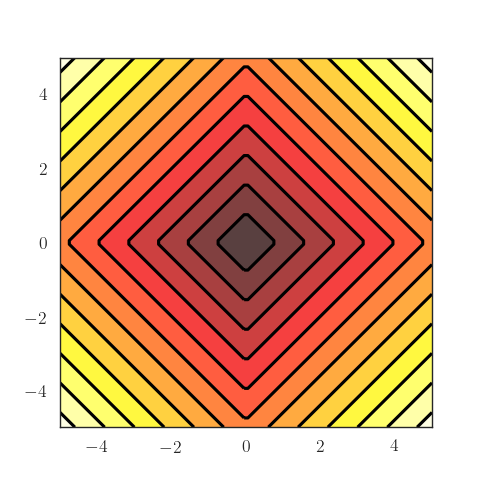

In [5]:
###############################################################################
# separable level set case 1

def funct_separable(X, Y):
    """ separable function to be displayed"""
    return 100 * (np.abs(X) + np.abs(Y))

Y, X = np.mgrid[-5:5:100j, -5:5:100j]
name = "separable_level_set"
plotting_level_set(funct_separable, Y, X, name, 12)


<IPython.core.display.Javascript object>


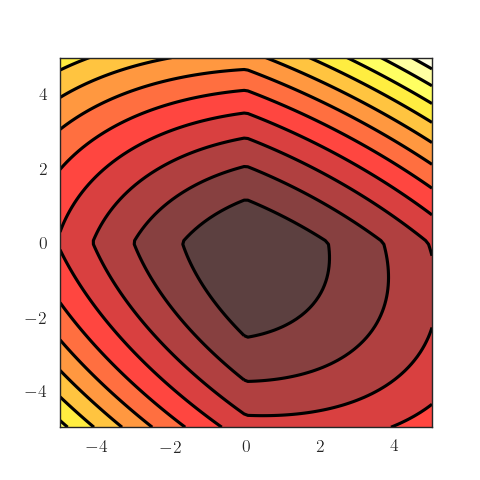

In [6]:
###############################################################################
# separable level set case 1


def funct_separable_bis(X, Y):
    """ separable function to be displayed"""
    return 10 * (np.abs(X) + np.abs(Y)) + \
        (0.5 * (3 * X ** 2 + 6 * Y ** 2 + 4 * (X * Y)) - 2 * X + 8 * Y)

Y, X = np.mgrid[-5:5:100j, -5:5:100j]
name = "separable_level_set10"
plotting_level_set(funct_separable_bis, Y, X, name, 12)


<IPython.core.display.Javascript object>


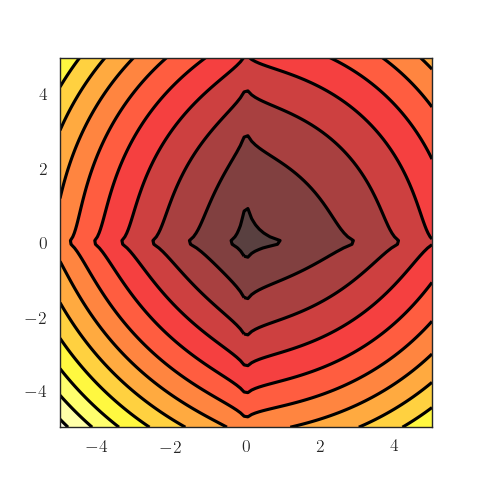

In [7]:

###############################################################################
# Non convex level set with l_1/2 pseudo norm penalty


def funct_non_cvx_sqrt(X, Y, threshold=3):
    """ non-cvx function to be displayed"""
    z = threshold * ((np.sqrt(np.abs(X)) + np.sqrt(np.abs(Y)))) + \
        (X - 1) ** 2 / 2 + (Y - 1) ** 2 / 2
    return z

threshold = 3
func_non_cvx = partial(funct_non_cvx_sqrt, threshold=threshold)
name = "non_cvx_sqrt_level_set"
plotting_level_set(func_non_cvx, Y, X, name, 12)


<IPython.core.display.Javascript object>


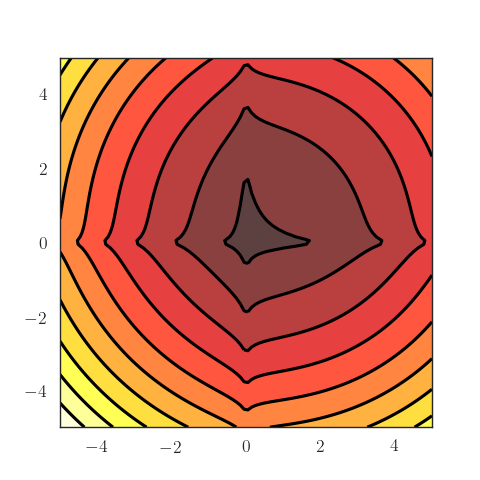

In [8]:
###############################################################################
# Non convex level set with log penalty


def funct_non_cvx_log(X, Y, threshold=1, eps=0.1):
    """ non-cvx function to be displayed"""
    z = threshold * np.log(1 + (np.abs(X)) / eps) + \
        threshold * np.log(1 + (np.abs(Y)) / eps) + \
        (X - 1) ** 2 / 2 + (Y - 1) ** 2 / 2
    return z

threshold = 1
eps = 0.1

func_non_cvx = partial(funct_non_cvx_sqrt, threshold=threshold, eps=eps)
name = "non_cvx_log_level_set"
plotting_level_set(funct_non_cvx_log, Y, X, name, 12)


<IPython.core.display.Javascript object>


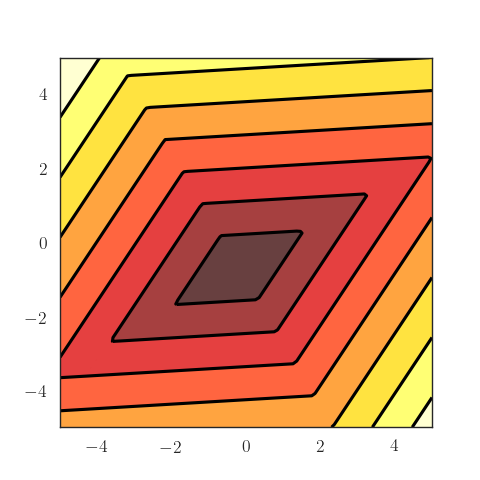

In [9]:
##############################################################################
# non separable level set


def funct_non_sep(X, Y):
    """ non separable function to be displayed"""
    sqrt3 = np.sqrt(3)
    return (np.abs(sqrt3 * X + 1 + Y) + 2 * np.abs(sqrt3 * Y - X + 1))

name = "non_separable_level_set"
plotting_level_set(funct_non_sep, Y, X, name, 8)


In [10]:
###############################################################################
# ploting prox operators


def plot_prox(x, threshold, prox, label, image_name, title):
    """Function to plot and save prox operators."""
    z = np.zeros(x.shape)
    for i, value in enumerate(np.nditer(x)):
        z[i] = prox(value, threshold)

    fig0 = plt.figure(figsize=(6, 6))
    ax1 = plt.subplot(111)
    ax1.plot(x, z, label=label)
    ax1.plot(x, x, 'k--', linewidth=1)
    plt.legend(loc="upper left", fontsize=34)
    ax1.get_yaxis().set_ticks([])
    ax1.get_xaxis().set_ticks([])
    plt.title(title)
    my_saving_display(fig0, dirname, image_name, imageformat)
    return

<IPython.core.display.Javascript object>


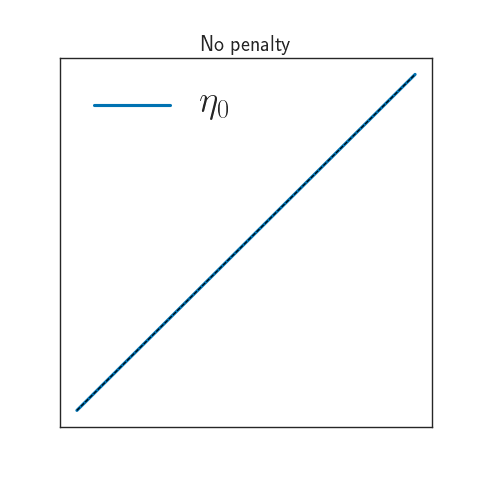

In [11]:
x = np.arange(-10, 10, step=0.01)

# No penalty
prox = l1_prox
image_name = "no_pen_orth_1d"
label = r"$\eta_{0}$"
plot_prox(x, 0, prox, label, image_name,'No penalty')

<IPython.core.display.Javascript object>


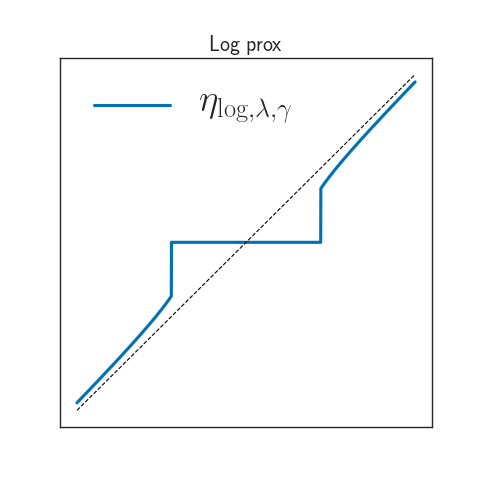

In [12]:
# Log prox
threshold = 4.5
epsilon = .5
label = r"$\eta_{\rm {log},\lambda,\gamma}$"
image_name = "log_orth_1d"
prox = partial(log_prox, epsilon=epsilon)
plot_prox(x, threshold, prox, label, image_name, 'Log prox')

<IPython.core.display.Javascript object>


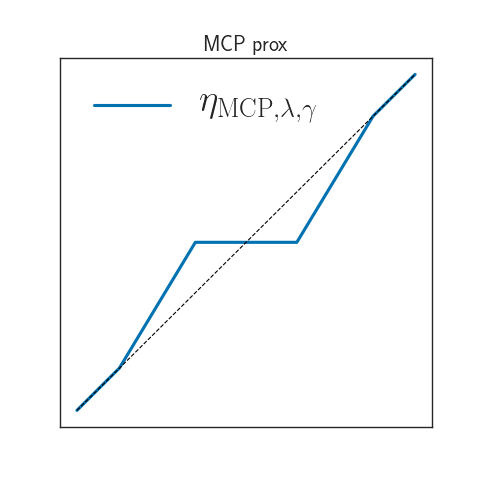

In [13]:
# MCP prox
threshold = 3
gamma = 2.5
label = r"$\eta_{\rm {MCP},\lambda,\gamma}$"
image_name = "mcp_orth_1d"
prox = partial(mcp_prox, gamma=gamma)
plot_prox(x, threshold, prox, label, image_name, 'MCP prox')

<IPython.core.display.Javascript object>


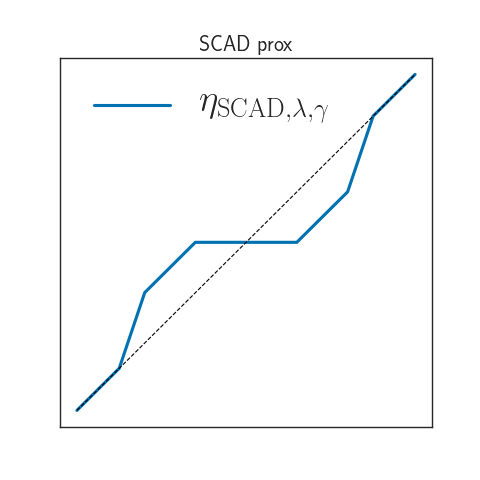

In [14]:
# SCAD prox
label = r"$\eta_{\rm {SCAD},\lambda,\gamma}$"
image_name = "scad_orth_1d"
prox = partial(scad_prox, gamma=gamma)
plot_prox(x, threshold, prox, label, image_name, 'SCAD prox')

<IPython.core.display.Javascript object>


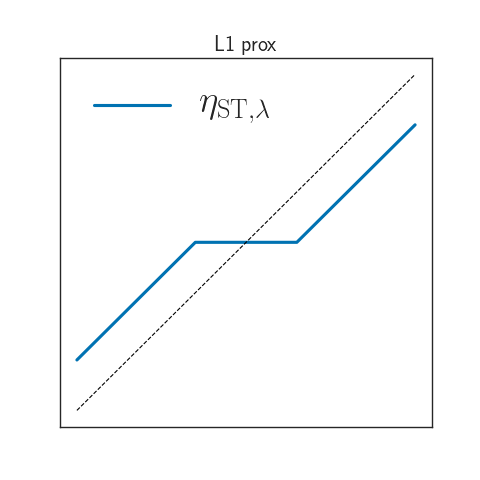

In [15]:
# L1 prox
prox = l1_prox
image_name = "l1_orth_1d"
label = r"$\eta_{\rm {ST},\lambda}$"
plot_prox(x, threshold, prox, label, image_name, 'L1 prox')

<IPython.core.display.Javascript object>


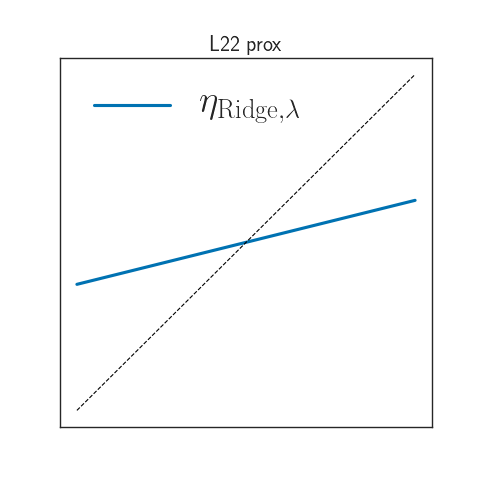

In [16]:
# l22 prox
prox = l22_prox
label = r"$\eta_{\rm {Ridge},\lambda}$"
image_name = "l22_orth_1d"
plot_prox(x, threshold, prox, label, image_name, 'L22 prox')

<IPython.core.display.Javascript object>


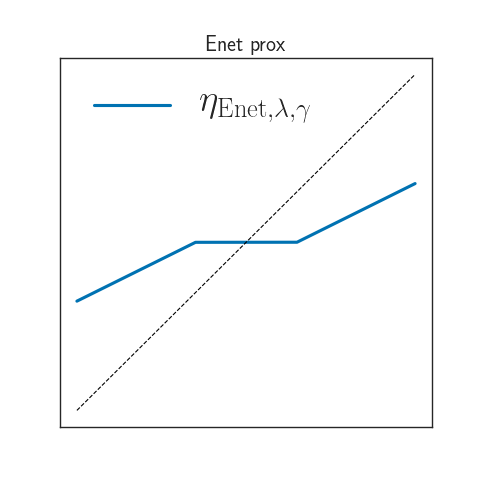

In [17]:
# Enet prox
beta = 1
label = r"$\eta_{\rm {Enet},\lambda,\gamma}$"
image_name = "enet_orth_1d"
prox = partial(enet_prox, beta=beta)
plot_prox(x, threshold, prox, label, image_name, 'Enet prox')

<IPython.core.display.Javascript object>


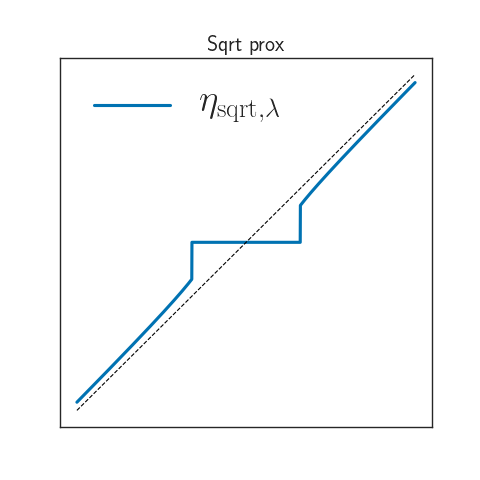

In [18]:
# Sqrt prox
label = r"$\eta_{\rm {sqrt},\lambda}$"
image_name = "sqrt_orth_1d"
prox = sqrt_prox
plot_prox(x, threshold, prox, label, image_name, 'Sqrt prox')


<IPython.core.display.Javascript object>


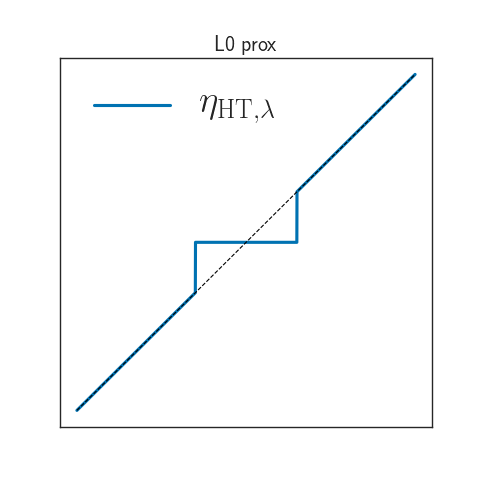

In [19]:
# L0 prox
threshold = 4.5
label = r"$\eta_{\rm {HT},\lambda}$"
image_name = "l0_orth_1d"
prox = l0_prox
plot_prox(x, threshold, prox, label, image_name, 'L0 prox')